In [3]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 40.3 MB/s eta 0:00:00


In [4]:
from sentence_transformers import SentenceTransformer, util
from sklearn.decomposition import PCA
import faiss
import matplotlib.pyplot as plt
import numpy as np

In [5]:
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [17]:
sentences = [ "Akhil is studying at university of bamberg",
             "akhil is part of team neon",
              "Delna and lakshmi are friends",
              "delna and lakshmi are part of team neon",
              "python is a popular programming language.",
              "Bamberg is in germany",
              "berlin is the capital of Germany.",
              "bamberg is far from berlin",
              "berlin is very crowded"]

embeddings = model.encode(sentences, convert_to_numpy=True).astype('float32')

In [18]:
cosSimMatrix = util.cos_sim(embeddings, embeddings)
print(cosSimMatrix)


tensor([[ 1.0000,  0.5766,  0.0814,  0.0899,  0.0682,  0.4874,  0.1233,  0.3906,
          0.1333],
        [ 0.5766,  1.0000,  0.2041,  0.5530, -0.0214,  0.1616,  0.0359,  0.0703,
          0.0638],
        [ 0.0814,  0.2041,  1.0000,  0.7632, -0.0722, -0.0070,  0.0325,  0.0055,
          0.0491],
        [ 0.0899,  0.5530,  0.7632,  1.0000, -0.0951,  0.0299, -0.0093, -0.0205,
          0.0067],
        [ 0.0682, -0.0214, -0.0722, -0.0951,  1.0000, -0.0235,  0.0845, -0.0114,
          0.0566],
        [ 0.4874,  0.1616, -0.0070,  0.0299, -0.0235,  1.0000,  0.4073,  0.8203,
          0.3249],
        [ 0.1233,  0.0359,  0.0325, -0.0093,  0.0845,  0.4073,  1.0000,  0.5519,
          0.6758],
        [ 0.3906,  0.0703,  0.0055, -0.0205, -0.0114,  0.8203,  0.5519,  1.0000,
          0.5595],
        [ 0.1333,  0.0638,  0.0491,  0.0067,  0.0566,  0.3249,  0.6758,  0.5595,
          1.0000]])


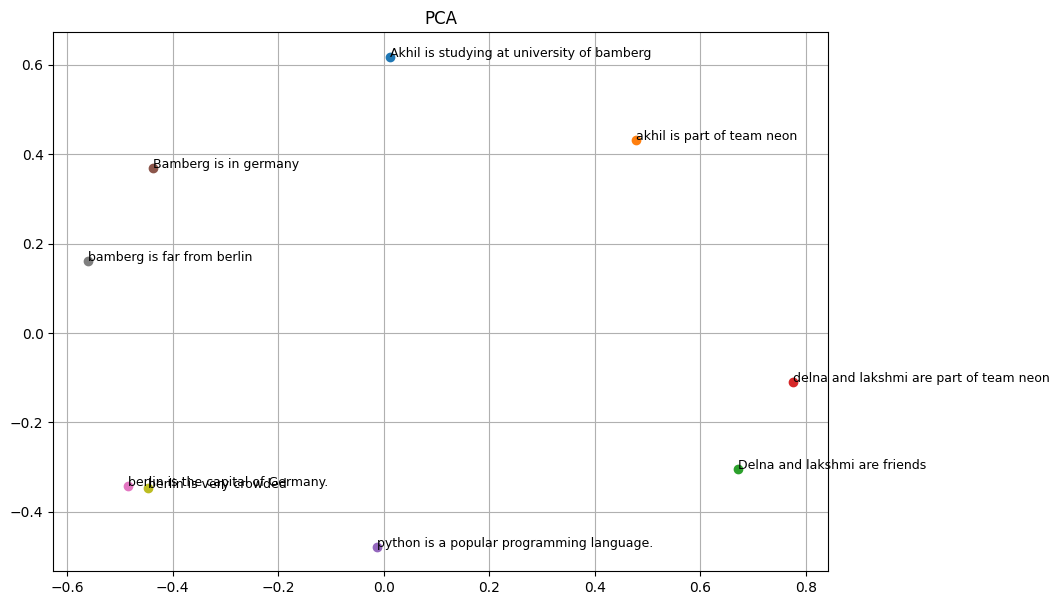

In [19]:

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
for i, label in enumerate(sentences):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.annotate(label, (x, y), fontsize=9)
plt.title('PCA')
plt.grid(True)
plt.show()

In [20]:
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)

In [26]:
queries = [
    "Where does Akhil study?",
    "Which university is Akhil attending?",
    "Akhil's current place of study?",
    "What institution is Akhil enrolled in?"
]

In [27]:
queryVector = model.encode(queries, convert_to_numpy=True).astype('float32')
distances, indices = index.search(queryVector, k=3)

for qId, q in enumerate(queries):
    print(f"\n query: {q}")
    print("Top answer:")
    for rank, idx in enumerate(indices[qId]):
        print(f"{rank+1}. {sentences[idx]} (Distance: {distances[qId][rank]:.4f})")


Query: Where does Akhil study?
Top Matches:
1. Akhil is studying at university of bamberg (Distance: 0.3265)
2. akhil is part of team neon (Distance: 0.9322)
3. Bamberg is in germany (Distance: 1.6242)

Query: Which university is Akhil attending?
Top Matches:
1. Akhil is studying at university of bamberg (Distance: 0.3451)
2. akhil is part of team neon (Distance: 0.8742)
3. Bamberg is in germany (Distance: 1.5927)

Query: Akhil's current place of study?
Top Matches:
1. Akhil is studying at university of bamberg (Distance: 0.3612)
2. akhil is part of team neon (Distance: 0.8973)
3. Bamberg is in germany (Distance: 1.6531)

Query: What institution is Akhil enrolled in?
Top Matches:
1. Akhil is studying at university of bamberg (Distance: 0.4269)
2. akhil is part of team neon (Distance: 0.8013)
3. Bamberg is in germany (Distance: 1.6186)


You can see that the for same question asked in a diffrent way the distance vary, for that last question, the distance is high. Even though the queries all mean the same thing, sentence transformers convert each query to a high dimensional vector where minor differences in worda affect distances. Since the last question is not at all direct the distance is high comparatively.